In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
import fiona
import networkx as nx
from collections import Counter
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
import json
from pygeocoder import Geocoder
import datetime
import cPickle as pickle
import os
import seaborn as sns
sns.set_style('darkgrid')

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from matplotlib import rc
rc('font', **{'family':'sans-serif',
    'sans-serif':['Helvetica'],
    'monospace': ['Inconsolata'],
    'serif': ['Adobe Garamamond Pro']})

In [3]:
data_list = os.listdir('place/')

In [4]:
dict_list = []
for dat in data_list:
    print dat
    with open('place/'+dat, 'r') as f:
        dict_list.append(pickle.load(f))

1300 On Fillmore.pkl
83 Proof.pkl
A'Gaci.pkl
Actual Cafe.pkl
Alana's Cafe.pkl
Amelie.pkl
Angeline's Louisiana Kitchen.pkl
Anthropologie.pkl
Aquatic Park.pkl
Arlequin Cafe & Food-To-Go.pkl
Au Coquelet.pkl
Auntie April's Chicken, Waffles, & Soul Food Restaurant.pkl
Avatar's.pkl
Avenue.pkl
Aziza.pkl
Baby Gap.pkl
Balboa Cafe.pkl
Bar Agricole.pkl
BCBG.pkl
bebe Bay Street.pkl
Bedwell Bayfront Park.pkl
Beehive Clothing.pkl
Bender's Bar & Grill.pkl
Benu.pkl
Bill's Cafe.pkl
Bix.pkl
Blue Bottle Coffee.pkl
Blush! Wine Bar.pkl
Boulevard.pkl
Brazil Cafe.pkl
Brenda's French Soul Food.pkl
Brown Sugar Kitchen.pkl
Buena Vista Park.pkl
Cafe Venetia.pkl
Cavallo Point Lodge.pkl
César Chávez Park.pkl
Chapeau!.pkl
Charlotte Russe.pkl
Cheese Board Pizza.pkl
Chez Panisse.pkl
Cigar Bar & Grill.pkl
Commonwealth.pkl
Corona Heights Park.pkl
Cotogna.pkl
Coupa Cafe.pkl
Coyote Hills Regional Park.pkl
Crazy 8.pkl
Creekside Inn.pkl
Crossroads Cafe.pkl
Cuesta Park.pkl
Dottie's True Blue Cafe.pkl
Eagle Cafe.pkl
Econo Lo

In [5]:
df = pd.DataFrame(dict_list)

In [6]:
newdf = df[['name','geometry', 'place_id', 'types']]

In [7]:
newdf['lat'] = newdf['geometry'].apply(lambda x: x['location']['lat'])
newdf['long'] = newdf['geometry'].apply(lambda x: x['location']['lng'])


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
newdf.drop('geometry',axis=1,inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
newdf

,name,place_id,types,lat,long
0,1300 On Fillmore,ChIJZbMizLuAhYARKiMObMwPGfc,"[night_club, restaurant, food, bar, point_of_i...",37.7816586,-122.4319167
1,83 Proof,ChIJr29cEGOAhYARGODjlpUST5A,"[bar, restaurant, food, point_of_interest, est...",37.7900567,-122.3977007
2,A'Gaci,ChIJVSjv47dmhYARFJi3vYC-QTg,"[shoe_store, clothing_store, store, point_of_i...",37.96819230000001,-122.0607534
3,Actual Cafe,ChIJJWkwLWF-hYARMvBio7rIkmA,"[meal_takeaway, cafe, store, restaurant, food,...",37.846841,-122.2847402
4,Alana's Cafe,ChIJd2ozDayjj4ARRfACIFI2LuY,"[cafe, restaurant, food, point_of_interest, es...",37.483561,-122.226574
5,Amelie,ChIJ88G-quuAhYAR7bj0Yhr8gwI,"[liquor_store, store, restaurant, food, bar, p...",37.7930855,-122.4210271
6,Angeline's Louisiana Kitchen,ChIJh_wjBJ1-hYARK2XCkZUkbg0,"[restaurant, meal_takeaway, food, point_of_int...",37.8682329,-122.2674992
7,Anthropologie,ChIJt0Qv0tx-hYARkOFQsWTWePw,"[home_goods_store, clothing_store, store, poin...",37.86887499999999,-122.299665
8,Aquatic Park,ChIJQ09tqOGAhYARinfjX2EOfaM,"[park, amusement_park, point_of_interest, esta...",37.8078379,-122.424275
9,Arlequin Cafe & Food-To-Go,ChIJr7uwv5iAhYAR4OZfo28tCME,"[cafe, bar, restaurant, food, point_of_interes...",37.777121,-122.422774


In [10]:
newdf.to_csv('data/newdf.csv', sep='\t', encoding='utf-8')

In [11]:
data = pd.read_csv('data/newdf.csv', delimiter='\t')

In [12]:
data.head()

,Unnamed: 0,name,place_id,types,lat,long
0,0,1300 On Fillmore,ChIJZbMizLuAhYARKiMObMwPGfc,"[night_club, restaurant, food, bar, point_of_i...",37.781659,-122.431917
1,1,83 Proof,ChIJr29cEGOAhYARGODjlpUST5A,"[bar, restaurant, food, point_of_interest, est...",37.790057,-122.397701
2,2,A'Gaci,ChIJVSjv47dmhYARFJi3vYC-QTg,"[shoe_store, clothing_store, store, point_of_i...",37.968192,-122.060753
3,3,Actual Cafe,ChIJJWkwLWF-hYARMvBio7rIkmA,"[meal_takeaway, cafe, store, restaurant, food,...",37.846841,-122.284740
4,4,Alana's Cafe,ChIJd2ozDayjj4ARRfACIFI2LuY,"[cafe, restaurant, food, point_of_interest, es...",37.483561,-122.226574


In [13]:
data.columns

Index([u'Unnamed: 0', u'name', u'place_id', u'types', u'lat', u'long'], dtype='object')

In [14]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
data.head()

,name,place_id,types,lat,long
0,1300 On Fillmore,ChIJZbMizLuAhYARKiMObMwPGfc,"[night_club, restaurant, food, bar, point_of_i...",37.781659,-122.431917
1,83 Proof,ChIJr29cEGOAhYARGODjlpUST5A,"[bar, restaurant, food, point_of_interest, est...",37.790057,-122.397701
2,A'Gaci,ChIJVSjv47dmhYARFJi3vYC-QTg,"[shoe_store, clothing_store, store, point_of_i...",37.968192,-122.060753
3,Actual Cafe,ChIJJWkwLWF-hYARMvBio7rIkmA,"[meal_takeaway, cafe, store, restaurant, food,...",37.846841,-122.284740
4,Alana's Cafe,ChIJd2ozDayjj4ARRfACIFI2LuY,"[cafe, restaurant, food, point_of_interest, es...",37.483561,-122.226574


In [16]:


import pandas as pd
import csv
import itertools
from math import radians, cos, sin, asin, sqrt


def haversine(origin,
              destination):
    """
    Find distance between a pair of lat/lng coordinates
    """
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [float(origin[0]), float(origin[1]),float(destination[0]), float(destination[1])])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 3959  # Radius of earth in miles
    return '%.2f' % (c * r)

def place_connect(places):
    """
    Cross places and return connection e.g. "v1-2" by ID
    """
    for i in range(len(places)-1):
        for j in range(i+1,len(places)):
            yield 'v'+str(places[i][0])+'-'+str(places[j][0])
            


# Initialize Cleaning
# ##############
# # Duplicates by coordinates (to 5dp)
# data['lat'] = data.lat.round(decimals=5)
# data['long'] = data.long.round(decimals=5)
# data = data.drop_duplicates(['lat', 'long'])

# clean name
data['name'] = data.name.str.upper()
data['name'] = data.name.str.strip()
print(data['name'].value_counts()[:10])

# new dataframe for selected "types"
print(data['types'].value_counts()[:10])
data_cafe = data[data['types'].str.contains("cafe")]
data_restaurants = data[data['types'].str.contains("restaurant")]
data_parks = data[data['types'].str.contains("park")]
data_lodging = data[data['types'].str.contains("lodging")]
data_store = data[data['types'].str.contains("store")]

ACTUAL CAFE              1
HOWIE'S ARTISAN PIZZA    1
QUINCE                   1
BENDER'S BAR & GRILL     1
SATURN CAFE              1
CHAPEAU!                 1
LA COSTANERA             1
AZIZA                    1
LITTLE STAR PIZZA        1
CAVALLO POINT LODGE      1
Name: name, dtype: int64
[restaurant, food, point_of_interest, establishment]                     38
[bar, restaurant, food, point_of_interest, establishment]                23
[lodging, point_of_interest, establishment]                              19
[park, point_of_interest, establishment]                                 17
[clothing_store, store, point_of_interest, establishment]                14
[cafe, restaurant, food, point_of_interest, establishment]               11
[cafe, bar, restaurant, food, point_of_interest, establishment]           4
[night_club, bar, restaurant, food, point_of_interest, establishment]     3
[meal_takeaway, restaurant, food, point_of_interest, establishment]       3
[restaurant, food, ba

In [17]:
data

,name,place_id,types,lat,long
0,1300 ON FILLMORE,ChIJZbMizLuAhYARKiMObMwPGfc,"[night_club, restaurant, food, bar, point_of_i...",37.781659,-122.431917
1,83 PROOF,ChIJr29cEGOAhYARGODjlpUST5A,"[bar, restaurant, food, point_of_interest, est...",37.790057,-122.397701
2,A'GACI,ChIJVSjv47dmhYARFJi3vYC-QTg,"[shoe_store, clothing_store, store, point_of_i...",37.968192,-122.060753
3,ACTUAL CAFE,ChIJJWkwLWF-hYARMvBio7rIkmA,"[meal_takeaway, cafe, store, restaurant, food,...",37.846841,-122.284740
4,ALANA'S CAFE,ChIJd2ozDayjj4ARRfACIFI2LuY,"[cafe, restaurant, food, point_of_interest, es...",37.483561,-122.226574
5,AMELIE,ChIJ88G-quuAhYAR7bj0Yhr8gwI,"[liquor_store, store, restaurant, food, bar, p...",37.793085,-122.421027
6,ANGELINE'S LOUISIANA KITCHEN,ChIJh_wjBJ1-hYARK2XCkZUkbg0,"[restaurant, meal_takeaway, food, point_of_int...",37.868233,-122.267499
7,ANTHROPOLOGIE,ChIJt0Qv0tx-hYARkOFQsWTWePw,"[home_goods_store, clothing_store, store, poin...",37.868875,-122.299665
8,AQUATIC PARK,ChIJQ09tqOGAhYARinfjX2EOfaM,"[park, amusement_park, point_of_interest, esta...",37.807838,-122.424275
9,ARLEQUIN CAFE & FOOD-TO-GO,ChIJr7uwv5iAhYAR4OZfo28tCME,"[cafe, bar, restaurant, food, point_of_interes...",37.777121,-122.422774


In [18]:
data_cafe

,name,place_id,types,lat,long
3,ACTUAL CAFE,ChIJJWkwLWF-hYARMvBio7rIkmA,"[meal_takeaway, cafe, store, restaurant, food,...",37.846841,-122.284740
4,ALANA'S CAFE,ChIJd2ozDayjj4ARRfACIFI2LuY,"[cafe, restaurant, food, point_of_interest, es...",37.483561,-122.226574
9,ARLEQUIN CAFE & FOOD-TO-GO,ChIJr7uwv5iAhYAR4OZfo28tCME,"[cafe, bar, restaurant, food, point_of_interes...",37.777121,-122.422774
10,AU COQUELET,ChIJU4rlzp5-hYARhtqduurlWiE,"[cafe, bar, restaurant, food, store, point_of_...",37.871630,-122.270539
12,AVATAR'S,ChIJjdERDQWFhYARvpaghgB3HQ4,"[cafe, restaurant, food, point_of_interest, es...",37.868536,-122.501798
16,BALBOA CAFE,ChIJYXn3mdCAhYAR97Hkb3wD660,"[cafe, bar, restaurant, food, point_of_interes...",37.798816,-122.436102
24,BILL'S CAFE,ChIJ9VUClAvLj4ARHWChPIsYVZA,"[cafe, bar, restaurant, food, point_of_interes...",37.343051,-121.928359
26,BLUE BOTTLE COFFEE,ChIJSy28upiAhYARkoxpzFnW7b4,"[cafe, food, store, point_of_interest, establi...",37.776196,-122.423316
33,CAFE VENETIA,ChIJkb6X_zi7j4ARKwExaaqqq2A,"[cafe, store, bar, food, point_of_interest, es...",37.447473,-122.160307
39,CHEZ PANISSE,ChIJcYtcJaF-hYAR-VzrwZpQY0E,"[restaurant, cafe, food, bar, point_of_interes...",37.879590,-122.268964


In [19]:
data_restaurants

,name,place_id,types,lat,long
0,1300 ON FILLMORE,ChIJZbMizLuAhYARKiMObMwPGfc,"[night_club, restaurant, food, bar, point_of_i...",37.781659,-122.431917
1,83 PROOF,ChIJr29cEGOAhYARGODjlpUST5A,"[bar, restaurant, food, point_of_interest, est...",37.790057,-122.397701
3,ACTUAL CAFE,ChIJJWkwLWF-hYARMvBio7rIkmA,"[meal_takeaway, cafe, store, restaurant, food,...",37.846841,-122.284740
4,ALANA'S CAFE,ChIJd2ozDayjj4ARRfACIFI2LuY,"[cafe, restaurant, food, point_of_interest, es...",37.483561,-122.226574
5,AMELIE,ChIJ88G-quuAhYAR7bj0Yhr8gwI,"[liquor_store, store, restaurant, food, bar, p...",37.793085,-122.421027
6,ANGELINE'S LOUISIANA KITCHEN,ChIJh_wjBJ1-hYARK2XCkZUkbg0,"[restaurant, meal_takeaway, food, point_of_int...",37.868233,-122.267499
9,ARLEQUIN CAFE & FOOD-TO-GO,ChIJr7uwv5iAhYAR4OZfo28tCME,"[cafe, bar, restaurant, food, point_of_interes...",37.777121,-122.422774
10,AU COQUELET,ChIJU4rlzp5-hYARhtqduurlWiE,"[cafe, bar, restaurant, food, store, point_of_...",37.871630,-122.270539
11,"AUNTIE APRIL'S CHICKEN, WAFFLES, & SOUL FOOD R...",ChIJSyGZhgV_j4AR8gsKMwaE38c,"[restaurant, food, point_of_interest, establis...",37.736133,-122.390451
12,AVATAR'S,ChIJjdERDQWFhYARvpaghgB3HQ4,"[cafe, restaurant, food, point_of_interest, es...",37.868536,-122.501798


In [20]:
data_parks

,name,place_id,types,lat,long
8,AQUATIC PARK,ChIJQ09tqOGAhYARinfjX2EOfaM,"[park, amusement_park, point_of_interest, esta...",37.807838,-122.424275
20,BEDWELL BAYFRONT PARK,ChIJKd3b4cy8j4ARoYmzezJVPko,"[park, point_of_interest, establishment]",37.492583,-122.173186
32,BUENA VISTA PARK,ChIJc-fv16uAhYARQNxL3WZRYHw,"[park, natural_feature, point_of_interest, est...",37.768203,-122.441770
35,CéSAR CHáVEZ PARK,ChIJFTWqXi5_hYARimk-cK6Tl_g,"[park, point_of_interest, establishment]",37.871621,-122.320412
42,CORONA HEIGHTS PARK,ChIJX3DWQgJ-j4ARxWqSTDOy_CU,"[park, point_of_interest, establishment]",37.765312,-122.438585
45,COYOTE HILLS REGIONAL PARK,ChIJRT7ghwq-j4ARQ68X9Fox0kE,"[park, point_of_interest, establishment]",37.553283,-122.085435
49,CUESTA PARK,ChIJ8QmpntO2j4ARX1iGIbLixxY,"[park, point_of_interest, establishment]",37.371931,-122.079563
63,GLEN CANYON PARK,ChIJ9SlCdnZ-j4AR86EzE6c9NY8,"[park, point_of_interest, establishment]",37.741559,-122.443185
65,GOLDEN GATE PARK,ChIJY_dFYHKHhYARMKc772iLvnE,"[park, point_of_interest, establishment]",37.769421,-122.486214
66,GRAND VIEW PARK,ChIJFS16LmCHhYAR9-5CGavbV2k,"[park, point_of_interest, establishment]",37.756263,-122.471845


In [21]:
data_lodging

,name,place_id,types,lat,long
34,CAVALLO POINT LODGE,ChIJi3J-pCWEhYARxYRB_BqquOA,"[spa, health, lodging, point_of_interest, esta...",37.837661,-122.479377
47,CREEKSIDE INN,ChIJk-81NEQzjoARbseaaQj2g_E,"[lodging, point_of_interest, establishment]",37.418698,-122.135259
52,ECONO LODGE,ChIJq0-3oE2Sj4ARLTB1NpnLN7Q,"[lodging, point_of_interest, establishment]",37.696145,-122.051321
72,HALF MOON BAY LODGE,ChIJnfXzUXILj4ARu-Rak_8q0ow,"[lodging, point_of_interest, establishment]",37.433209,-122.428202
77,IHG ARMY HOTELS CAMP PARKS,ChIJSfJgPSDsj4ARVapHam2QY0k,"[lodging, point_of_interest, establishment]",37.720466,-121.903042
78,INN AT THE PRESIDIO,ChIJ24LodCiHhYAR3sr-G5wBU7k,"[lodging, point_of_interest, establishment]",37.797112,-122.457825
79,INVERNESS VALLEY INN,ChIJJ1X-fL7PhYAR4qr4Encgco4,"[lodging, point_of_interest, establishment]",38.108784,-122.870788
94,LINGONBERRY FARM,ChIJkZe7ReTFhYARvpnBCO-CLZI,"[lodging, point_of_interest, establishment]",38.084379,-122.809709
96,LODGING INNOVATIONS,ChIJz6YKzrTLj4ARbLEfUsRxK-U,"[lodging, point_of_interest, establishment]",37.357520,-121.946970
99,MANKA'S INVERNESS LODGE,ChIJMy6lqJzPhYARExzvWXxEyQA,"[lodging, point_of_interest, establishment]",38.101528,-122.859238


In [22]:
data_store['types']

2      [shoe_store, clothing_store, store, point_of_i...
3      [meal_takeaway, cafe, store, restaurant, food,...
5      [liquor_store, store, restaurant, food, bar, p...
7      [home_goods_store, clothing_store, store, poin...
10     [cafe, bar, restaurant, food, store, point_of_...
13     [clothing_store, store, point_of_interest, est...
15     [clothing_store, store, point_of_interest, est...
18     [clothing_store, store, point_of_interest, est...
19     [clothing_store, store, point_of_interest, est...
21     [clothing_store, store, point_of_interest, est...
26     [cafe, food, store, point_of_interest, establi...
33     [cafe, store, bar, food, point_of_interest, es...
37     [shoe_store, clothing_store, jewelry_store, st...
44     [cafe, restaurant, food, store, point_of_inter...
46     [clothing_store, store, point_of_interest, est...
48     [cafe, food, store, point_of_interest, establi...
53     [cafe, store, restaurant, food, point_of_inter...
54     [clothing_store, store, 

In [23]:
#grab desired places from user_submitted ranking
########################################################
data['places'] = ''
pd.options.mode.chained_assignment = None  # default='war
 

# pick 1
match = data.name.str.contains('(^TILDEN)(.*)( )(REGIONAL)(.*)( )(PARK)')
print(data['name'][match].value_counts()) # Check what hits we are getting
print("Total: ",sum(match))
data['places'][match] = "TRP"

# pick 2
match = data.name.str.contains('(^TOMALES)(.*)( )(BAY)(.*)( )(RESORT)(.*)( )(&)(.*)( )(MARINA)')
print(data['name'][match].value_counts()) # Check what hits we are getting
print("Total: ",sum(match))
data['places'][match] = "TBRM"

#pick 3
match = data.name.str.contains('(^STABLE)(.*)( )(CAFE)')
print(data['name'][match].value_counts()) # Check what hits we are getting
print("Total: ",sum(match))
data['places'][match] = "SC"


#pick 4
match = data.name.str.contains('(^BROWN)(.*)( )(SUGAR)(.*)( )(KITCHEN)')
print(data['name'][match].value_counts()) # Check what hits we are getting
print("Total: ",sum(match))
data['places'][match] = "BSK"


#pick 5
match = data.name.str.contains('(^BLUE)(.*)( )(BOTTLE)(.*)( )(COFFEE)')
print(data['name'][match].value_counts()) # Check what hits we are getting
print("Total: ",sum(match))
data['places'][match] = "BBC"

#pick 6
match = data.name.str.contains('(^CHEESE)(.*)( )(BOARD)(.*)( )(PIZZA)')
print(data['name'][match].value_counts()) # Check what hits we are getting
print("Total: ",sum(match))
data['places'][match] = "CBP"


#pick 7
match = data.name.str.contains('(^THE)(.*)( )(SLANTED)(.*)( )(DOOR)')
print(data['name'][match].value_counts()) # Check what hits we are getting
print("Total: ",sum(match))
data['places'][match] = "TSD"

 
# remove non-filtered entries and add an index
data_filtered = data[data['places'] != ""]
data_filtered['place_id'] = data_filtered.index
 
print(data_filtered['places'].value_counts())
 
# extract selected places in optimization inputs to a list

all_places_lst = data_filtered[['name','lat', 'long', 'place_id']].values.tolist()
print(len(all_places_lst))
print all_places_lst

TILDEN REGIONAL PARK    1
Name: name, dtype: int64
('Total: ', 1)
TOMALES BAY RESORT & MARINA    1
Name: name, dtype: int64
('Total: ', 1)
STABLE CAFE    1
Name: name, dtype: int64
('Total: ', 1)
BROWN SUGAR KITCHEN    1
Name: name, dtype: int64
('Total: ', 1)
BLUE BOTTLE COFFEE    1
Name: name, dtype: int64
('Total: ', 1)
CHEESE BOARD PIZZA    1
Name: name, dtype: int64
('Total: ', 1)
THE SLANTED DOOR    1
Name: name, dtype: int64
('Total: ', 1)
BBC     1
TSD     1
TRP     1
SC      1
BSK     1
CBP     1
TBRM    1
Name: places, dtype: int64
7
[['BLUE BOTTLE COFFEE', 37.776196, -122.42331599999999, 26], ['BROWN SUGAR KITCHEN', 37.820327899999995, -122.28879679999999, 31], ['CHEESE BOARD PIZZA', 37.87987229999999, -122.2694794, 38], ['STABLE CAFE', 37.76323670000001, -122.4154832, 142], ['THE SLANTED DOOR', 37.796188799999996, -122.39404099999999, 156], ['TILDEN REGIONAL PARK', 37.892767000000006, -122.242451, 158], ['TOMALES BAY RESORT & MARINA', 38.107037899999995, -122.8628638, 159]]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:47: UserWarning: This p

In [24]:
data_filtered

,name,place_id,types,lat,long,places
26,BLUE BOTTLE COFFEE,26,"[cafe, food, store, point_of_interest, establi...",37.776196,-122.423316,BBC
31,BROWN SUGAR KITCHEN,31,"[restaurant, food, point_of_interest, establis...",37.820328,-122.288797,BSK
38,CHEESE BOARD PIZZA,38,"[restaurant, food, point_of_interest, establis...",37.879872,-122.269479,CBP
142,STABLE CAFE,142,"[cafe, meal_takeaway, restaurant, food, store,...",37.763237,-122.415483,SC
156,THE SLANTED DOOR,156,"[bar, restaurant, food, point_of_interest, est...",37.796189,-122.394041,TSD
158,TILDEN REGIONAL PARK,158,"[park, point_of_interest, establishment]",37.892767,-122.242451,TRP
159,TOMALES BAY RESORT & MARINA,159,"[lodging, point_of_interest, establishment]",38.107038,-122.862864,TBRM


In [25]:
mission = [37.7599, -122.4148]
berkeley = [37.8716, -122.2727]

cut_off = 20
# Alo concatenate the ID with the name
place_list = [[str(x[3])+"_"+x[0],x[1],x[2]] for x in all_places_lst if
                  float(haversine(berkeley,[x[1],x[2]] )) <= cut_off]
 
print("Cut list contains %d places" % len(place_list)) 
print place_list

Cut list contains 6 places
[['26_BLUE BOTTLE COFFEE', 37.776196, -122.42331599999999], ['31_BROWN SUGAR KITCHEN', 37.820327899999995, -122.28879679999999], ['38_CHEESE BOARD PIZZA', 37.87987229999999, -122.2694794], ['142_STABLE CAFE', 37.76323670000001, -122.4154832], ['156_THE SLANTED DOOR', 37.796188799999996, -122.39404099999999], ['158_TILDEN REGIONAL PARK', 37.892767000000006, -122.242451]]


In [26]:

cross_places = [[place_list[i],place_list[j]] 
                for i in range(len(place_list)) 
                for j in range(len(place_list)) 
                if i!=j] 
print(len(cross_places))
print cross_places


# export distances to calculate to a CSV
#########################################
f = open('walk_to_calculate.csv', 'w')
w = csv.writer(f)
w.writerow(["place_A", "Lat_A", "Lon_A", "place_B", "Lat_B","Lon_B"])
for x in cross_places:
    w.writerow([x[0][0],x[0][1],x[0][2],x[1][0],x[1][1],x[1][2]])
f.close()

30
[[['26_BLUE BOTTLE COFFEE', 37.776196, -122.42331599999999], ['31_BROWN SUGAR KITCHEN', 37.820327899999995, -122.28879679999999]], [['26_BLUE BOTTLE COFFEE', 37.776196, -122.42331599999999], ['38_CHEESE BOARD PIZZA', 37.87987229999999, -122.2694794]], [['26_BLUE BOTTLE COFFEE', 37.776196, -122.42331599999999], ['142_STABLE CAFE', 37.76323670000001, -122.4154832]], [['26_BLUE BOTTLE COFFEE', 37.776196, -122.42331599999999], ['156_THE SLANTED DOOR', 37.796188799999996, -122.39404099999999]], [['26_BLUE BOTTLE COFFEE', 37.776196, -122.42331599999999], ['158_TILDEN REGIONAL PARK', 37.892767000000006, -122.242451]], [['31_BROWN SUGAR KITCHEN', 37.820327899999995, -122.28879679999999], ['26_BLUE BOTTLE COFFEE', 37.776196, -122.42331599999999]], [['31_BROWN SUGAR KITCHEN', 37.820327899999995, -122.28879679999999], ['38_CHEESE BOARD PIZZA', 37.87987229999999, -122.2694794]], [['31_BROWN SUGAR KITCHEN', 37.820327899999995, -122.28879679999999], ['142_STABLE CAFE', 37.76323670000001, -122.415

In [27]:
"""
Helper function to plot map
"""
def geo_network(all_places, places_in_group, connections, name='network_map.html', minutes=120):
    """
    Helper function:
    Plot the network on an easy-to-read google-map
    """
    map = []
    for x in all_places:
        if x[0] in places_in_group:
            # places in cliques
            map.append("<marker name = \"%s\" lat = \"%.5f\" lng = \"%.5f\" col = \"red\"/>"
                       % (x[0],x[1],x[2]))
        else:
            # places not in cliques
            map.append("<marker name = \"%s\" lat = \"%.5f\" lng = \"%.5f\" col = \"green\"/>"
                       % (x[0],x[1],x[2]))
    for x in connections:
        if float(x[-1]) <= minutes:
            # Connections
            map.append("<line latfrom = \"%.5f\" longfrom = \"%.5f\" latto = \"%.5f\" longto = \"%.5f\"/>"
                       % (float(x[1]),float(x[2]),float(x[4]),float(x[5]))) 
    # Map part 1
    htmltext = """<!DOCTYPE html >
 
<style type="text/css">
                        html, body {
                            height: 100%;
                            width: 100%;
                            padding: 0;
                            margin: 0;
                        }
                        .labels {
                            color: black;
                            background-color: white;
                            font-family: "Lucida Grande", "Arial", sans-serif;
                    font-size: 10px;
                            text-align: center;
                    width: 45px;
                            border: 0 solid black;
                            white-space: nowrap;
                        }
                    </style>
 
                    <html>
                    <head>
                    <meta name="viewport" content="initial-scale=1.0, user-scalable=yes" />
                    <meta http-equiv="content-type" content="text/html; charset=UTF-8"/>
                    <title>Network</title>
                    <xml id="myxml">"""
    # Map part 2
    for x in map:
        htmltext += x + "\n"
     
    # Map part 3
    htmltext += """
            </xml>
            <script type="text/javascript" src="https://maps.googleapis.com/maps/api/js?&libraries=geometry"></script>
            <script type="text/javascript" src="http://google-maps-utility-library-v3.googlecode.com/svn/trunk/markerwithlabel/src/markerwithlabel.js"></script>
            <script>
            var XML = document.getElementById("myxml");
            if(XML.documentElement == null)
            XML.documentElement = XML.firstChild;
            var MARKERS = XML.getElementsByTagName("marker");
            var LINES = XML.getElementsByTagName("line");
            function initialize() {
                 var mapOptions = {
                                center: new google.maps.LatLng(37.76324,-122.41548),
                                zoom: 12,
                                styles:
                                [
                                {"featureType":"administrative","stylers":[{ "saturation":-80},{"visibility":"off"}]},
                                {"featureType":"landscape.natural","elementType":"geometry","stylers":[{"color":"#d0e3b4"}]},
                                {"featureType":"landscape.natural.terrain","elementType":"geometry","stylers":[{"visibility":"off"}]},
                                {"featureType":"poi","elementType":"labels","stylers":[{"visibility":"on"}]},
                                {"featureType":"poi.business","elementType":"all","stylers":[{"visibility":"off"}]},
                                {"featureType":"poi.medical","elementType":"geometry","stylers":[{"color":"#fbd3da"}]},
                                {"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#bde6ab"}]},
                                {"featureType":"road","elementType":"geometry.stroke","stylers":[{"visibility":"off"}]},
                                {"featureType":"road","elementType":"labels","stylers":[{"visibility":"off"}]},
                                {"featureType":"road.highway","elementType":"geometry.fill","stylers":[{"color":"#ffe15f"}]},
                                {"featureType":"road.highway","elementType":"geometry.stroke","stylers":[{"color":"#efd151"}]},
                                {"featureType":"road.arterial","elementType":"geometry.fill","stylers":[{"color":"#ffffff"}]},
                                {"featureType":"road.local","elementType":"geometry.fill","stylers":[{"color":"black"}]},
                                {"featureType":"transit","stylers":[{"visibility":"off"}]},
                                {"featureType":"water","elementType":"geometry","stylers":[{"color":"#a2daf2"}]}
                                ]
                        };
                var map = new google.maps.Map(document.getElementById('map'),
                    mapOptions);
                var bounds = new google.maps.LatLngBounds();
                for (var i = 0; i < MARKERS.length; i++) {
                    var name = MARKERS[i].getAttribute("name");
                    var point_i = new google.maps.LatLng(
                        parseFloat(MARKERS[i].getAttribute("lat")),
                        parseFloat(MARKERS[i].getAttribute("lng")));
                    var col =  MARKERS[i].getAttribute("col")
                    if (col == "green") {
                        var ic = "https://storage.googleapis.com/support-kms-prod/SNP_2752129_en_v0"
                    } else {
                        var ic = "https://storage.googleapis.com/support-kms-prod/SNP_2752125_en_v0"
                    }
                    var marker = new MarkerWithLabel({
                        position: point_i,
                        map: map,
                        icon: ic,
                        //labelContent: name,
                        labelAnchor: new google.maps.Point(22, 0),
                        labelClass: "labels", // the CSS class for the label
                        labelStyle: {opacity: 0.75},
                    })
                    bounds.extend(point_i);
                };          
            for (var i = 0; i < LINES.length; i++) {
                var point_a = new google.maps.LatLng(
                        parseFloat(LINES[i].getAttribute("latfrom")),
                        parseFloat(LINES[i].getAttribute("longfrom")));
                var point_b = new google.maps.LatLng(
                        parseFloat(LINES[i].getAttribute("latto")),
                        parseFloat(LINES[i].getAttribute("longto")));
                var flightPlanCoordinates = [
                    point_a,
                    point_b
                ];
                var flightPath = new google.maps.Polyline({
                    path: flightPlanCoordinates,
                    geodesic: true,
                    strokeColor: 'black',
                    strokeOpacity: 1,
                    strokeWeight: 1
                });
                flightPath.setMap(map);
            };
            }
            google.maps.event.addDomListener(window, 'load', initialize);
            </script>
            </head>
            <body>
            <center>
 
<div id="map" style="width:95%; height:1200px;"></div>
 
            <center>
            </body>
            </html>       
    """
    with open(name, 'w') as f:
        f.write(htmltext)
    f.close() 

In [28]:

import csv
import networkx as nx  
from pylab import *
 
def is_problematic(grp):
    if len(grp) > 2:
        return True
    return False
 
def extract_clusters(clusters):  
    """
    From a list of clusters/groups, extract unique places
    and the cluster if it is problematic
    """
    lst_clqs = []  # Contains all the groups
    unq_places_clq = [] # Contains places in a clique
    for c in clusters:
        if is_problematic(c):
            lst_clqs.append(c)
            for x in c:
                if x not in unq_places_clq:
                    unq_places_clq.append(x)
    return [lst_clqs,unq_places_clq]
 
minutes = 240  
 
# Read in calculated distances
#[store_a],[lat_a],[lon_a],[store_b],[lat_b],[lon_b],[time_min]
in_data = []
with open('walk_to_calculate.csv') as f:
    reader = csv.reader(f)
    headers = next(f)
    for x in reader:
        in_data.append(x)
f.close()



In [29]:
data_edges = [(x[0],x[3], {'weight': float(haversine([x[4], x[5]], [x[1],x[2]]))}) for x in in_data if float(x[-1]) <= minutes]

In [30]:


# data_edges = [(x[0],x[3], {'weight': float(haversine([x[4], x[5]], [x[1],x[2]]))}) for x in in_data if float(x[-1]) <= minutes]
# # Add edges


G=nx.Graph()
G.add_edges_from(data_edges)
 
# Clique Analysis
find_cliq = nx.find_cliques(G)
lst_clqs,unq_places_clq = extract_clusters(find_cliq)
                 
print("%d total places in analysis" % len(place_list))
print("%d places in problematic cliques:" % len(unq_places_clq))  
 
print("Problematic cliques:")
for x in lst_clqs:
    print(x)
     
print("Alternatively, problematic clusters:")
for x in nx.connected_components(G):
    print(x)
     

geo_network(place_list, unq_places_clq, in_data, 'unop_network_map.html', minutes) 
 
print("%.0f percent of places in a problematic clique" % (len(unq_places_clq)/len(place_list)*100))


6 total places in analysis
6 places in problematic cliques:
Problematic cliques:
['26_BLUE BOTTLE COFFEE', '38_CHEESE BOARD PIZZA', '158_TILDEN REGIONAL PARK', '31_BROWN SUGAR KITCHEN', '142_STABLE CAFE', '156_THE SLANTED DOOR']
Alternatively, problematic clusters:
set(['26_BLUE BOTTLE COFFEE', '31_BROWN SUGAR KITCHEN', '142_STABLE CAFE', '38_CHEESE BOARD PIZZA', '156_THE SLANTED DOOR', '158_TILDEN REGIONAL PARK'])
100 percent of places in a problematic clique


In [31]:
# from pulp import *
 

# prob = LpProblem("Maximise points kept",LpMaximize)
 

# x = []
# for place in unq_places_clq:
#     x.append(LpVariable(place,0,1,LpInteger)) 


# prob += pulp.lpSum(x[i] for i in range(len(unq_places_clq)))
# for one_clique in lst_clqs:   
#     prob += pulp.lpSum(
#         x[unq_places_clq.index(one_clique[i])] 
#         for i in range(len(one_clique))) <= 5

# prob.writeLP("cliques.lp")
# # Solve
# prob.solve()
# # The status of the solution is printed to the screen
# print("Status:", LpStatus[prob.status])
# # Optimum variable values
# drop_points = []
# for v in prob.variables():
#     print(v.name, "=", v.varValue)
#     if v.varValue == 0:
#          drop_points.append(v.name)
            
# print prob.objective
            

# print("Number of points kept = ", int(value(prob.objective)))   
# # Dropping
# print("Number of points dropped = ", len(unq_places_clq) - int(value(prob.objective)))
# print drop_points

In [32]:
# """
# Test out our new number of cliques
# """
# opt_edges = [x for x in data_edges if (x[0] not in drop_points and x[1] not in drop_points)]
# opt_in_data = [x for x in in_data if (x[0] not in drop_points and x[3] not in drop_points)]
# opt_place_list = [x for x in place_list if x[0] not in drop_points]
# print opt_place_list
# print (opt_edges)


# # Add edges
# opt_G=nx.Graph()
# opt_G.add_edges_from(opt_edges)
# pos = nx.spring_layout(opt_G)
# nx.draw(opt_G,pos,node_color='b', with_labels=True)
# # Clique Analysis
# opt_find_cliq = nx.find_cliques(opt_G)
# opt_lst_clqs,opt_unq_places_clq = extract_clusters(find_cliq)

# print("located %d places in a problematic clique" % len(opt_unq_places_clq))

# # Geographic Diagram (instead)
# geo_network(opt_place_list, opt_unq_places_clq, opt_in_data, 'opt_network_map.html', minutes)      


In [33]:
data_edges

[('26_BLUE BOTTLE COFFEE', '31_BROWN SUGAR KITCHEN', {'weight': 7.95}),
 ('26_BLUE BOTTLE COFFEE', '38_CHEESE BOARD PIZZA', {'weight': 11.04}),
 ('26_BLUE BOTTLE COFFEE', '142_STABLE CAFE', {'weight': 0.99}),
 ('26_BLUE BOTTLE COFFEE', '156_THE SLANTED DOOR', {'weight': 2.11}),
 ('26_BLUE BOTTLE COFFEE', '158_TILDEN REGIONAL PARK', {'weight': 12.74}),
 ('31_BROWN SUGAR KITCHEN', '26_BLUE BOTTLE COFFEE', {'weight': 7.95}),
 ('31_BROWN SUGAR KITCHEN', '38_CHEESE BOARD PIZZA', {'weight': 4.25}),
 ('31_BROWN SUGAR KITCHEN', '142_STABLE CAFE', {'weight': 7.96}),
 ('31_BROWN SUGAR KITCHEN', '156_THE SLANTED DOOR', {'weight': 5.98}),
 ('31_BROWN SUGAR KITCHEN', '158_TILDEN REGIONAL PARK', {'weight': 5.61}),
 ('38_CHEESE BOARD PIZZA', '26_BLUE BOTTLE COFFEE', {'weight': 11.04}),
 ('38_CHEESE BOARD PIZZA', '31_BROWN SUGAR KITCHEN', {'weight': 4.25}),
 ('38_CHEESE BOARD PIZZA', '142_STABLE CAFE', {'weight': 11.33}),
 ('38_CHEESE BOARD PIZZA', '156_THE SLANTED DOOR', {'weight': 8.92}),
 ('38_CHEE

[('26_BLUE BOTTLE COFFEE', '31_BROWN SUGAR KITCHEN', {'weight': 7.95}), ('26_BLUE BOTTLE COFFEE', '38_CHEESE BOARD PIZZA', {'weight': 11.04}), ('26_BLUE BOTTLE COFFEE', '142_STABLE CAFE', {'weight': 0.99}), ('26_BLUE BOTTLE COFFEE', '156_THE SLANTED DOOR', {'weight': 2.11}), ('26_BLUE BOTTLE COFFEE', '158_TILDEN REGIONAL PARK', {'weight': 12.74}), ('31_BROWN SUGAR KITCHEN', '26_BLUE BOTTLE COFFEE', {'weight': 7.95}), ('31_BROWN SUGAR KITCHEN', '38_CHEESE BOARD PIZZA', {'weight': 4.25}), ('31_BROWN SUGAR KITCHEN', '142_STABLE CAFE', {'weight': 7.96}), ('31_BROWN SUGAR KITCHEN', '156_THE SLANTED DOOR', {'weight': 5.98}), ('31_BROWN SUGAR KITCHEN', '158_TILDEN REGIONAL PARK', {'weight': 5.61}), ('38_CHEESE BOARD PIZZA', '26_BLUE BOTTLE COFFEE', {'weight': 11.04}), ('38_CHEESE BOARD PIZZA', '31_BROWN SUGAR KITCHEN', {'weight': 4.25}), ('38_CHEESE BOARD PIZZA', '142_STABLE CAFE', {'weight': 11.33}), ('38_CHEESE BOARD PIZZA', '156_THE SLANTED DOOR', {'weight': 8.92}), ('38_CHEESE BOARD PIZZA

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


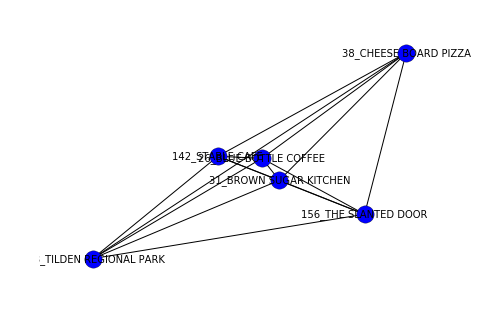

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G=nx.Graph()
G.add_edges_from(data_edges)
print data_edges
pos = nx.spring_layout(G)
path = nx.shortest_path(G)
nx.draw(G,pos,node_color='b', with_labels=True, font_size=10)




In [35]:
points = data_filtered[['lat','long']]

In [36]:
points.head()

,lat,long
26,37.776196,-122.423316
31,37.820328,-122.288797
38,37.879872,-122.269479
142,37.763237,-122.415483
156,37.796189,-122.394041


In [37]:
points.to_csv('points.csv', sep='\t', encoding='utf-8')

In [38]:
points.head()

,lat,long
26,37.776196,-122.423316
31,37.820328,-122.288797
38,37.879872,-122.269479
142,37.763237,-122.415483
156,37.796189,-122.394041


[['26_BLUE BOTTLE COFFEE', '37.776196', '-122.42331599999999', '31_BROWN SUGAR KITCHEN', '37.820327899999995', '-122.28879679999999'], ['26_BLUE BOTTLE COFFEE', '37.776196', '-122.42331599999999', '38_CHEESE BOARD PIZZA', '37.87987229999999', '-122.2694794'], ['26_BLUE BOTTLE COFFEE', '37.776196', '-122.42331599999999', '142_STABLE CAFE', '37.76323670000001', '-122.4154832'], ['26_BLUE BOTTLE COFFEE', '37.776196', '-122.42331599999999', '156_THE SLANTED DOOR', '37.796188799999996', '-122.39404099999999'], ['26_BLUE BOTTLE COFFEE', '37.776196', '-122.42331599999999', '158_TILDEN REGIONAL PARK', '37.892767000000006', '-122.242451'], ['31_BROWN SUGAR KITCHEN', '37.820327899999995', '-122.28879679999999', '26_BLUE BOTTLE COFFEE', '37.776196', '-122.42331599999999'], ['31_BROWN SUGAR KITCHEN', '37.820327899999995', '-122.28879679999999', '38_CHEESE BOARD PIZZA', '37.87987229999999', '-122.2694794'], ['31_BROWN SUGAR KITCHEN', '37.820327899999995', '-122.28879679999999', '142_STABLE CAFE', '

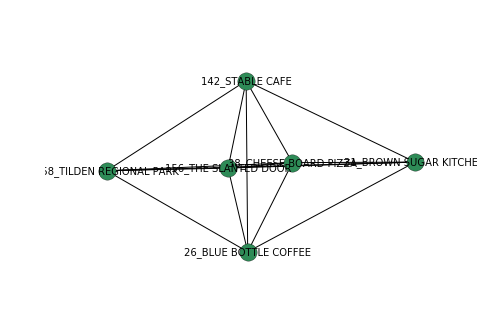

In [95]:
import csv
from math import radians, cos, sin, asin, sqrt
from pulp import *

f = open('points.csv', 'w')
w = csv.writer(f)
w.writerow(["place_A", "Lat_A", "Lon_A", "place_B", "Lat_B","Lon_B"])
for x in cross_places:
    w.writerow([x[0][0],x[0][1],x[0][2],x[1][0],x[1][1],x[1][2]])
f.close()

in_points = []
with open('points.csv') as f:
    reader = csv.reader(f)
    headers = next(f)
    for x in reader:
        in_points.append(x)
f.close()

print in_points

new_data_edges = [(x[0],x[3], {'weight': float(haversine([x[4], x[5]], [x[1],x[2]]))}) for x in in_points]


G_new=nx.Graph()
G_new.add_edges_from(new_data_edges)
pos = nx.spring_layout(G_new)
path = nx.shortest_path(G_new)
nx.draw(G_new,pos,node_color='seagreen', with_labels=True, font_size=10)
 
# Clique Analysis
find_cliq = nx.find_cliques(G_new)
lst_clqs,unq_places_clq = extract_clusters(find_cliq)
print lst_clqs
 


In [40]:
points

,lat,long
26,37.776196,-122.423316
31,37.820328,-122.288797
38,37.879872,-122.269479
142,37.763237,-122.415483
156,37.796189,-122.394041
158,37.892767,-122.242451
159,38.107038,-122.862864


In [41]:
nx.clustering(G_new)

{'142_STABLE CAFE': 1.0,
 '156_THE SLANTED DOOR': 1.0,
 '158_TILDEN REGIONAL PARK': 1.0,
 '26_BLUE BOTTLE COFFEE': 1.0,
 '31_BROWN SUGAR KITCHEN': 1.0,
 '38_CHEESE BOARD PIZZA': 1.0}

In [42]:
nx.all_pairs_node_connectivity(G_new)

{'142_STABLE CAFE': {'156_THE SLANTED DOOR': 5,
  '158_TILDEN REGIONAL PARK': 5,
  '26_BLUE BOTTLE COFFEE': 5,
  '31_BROWN SUGAR KITCHEN': 5,
  '38_CHEESE BOARD PIZZA': 5},
 '156_THE SLANTED DOOR': {'142_STABLE CAFE': 5,
  '158_TILDEN REGIONAL PARK': 5,
  '26_BLUE BOTTLE COFFEE': 5,
  '31_BROWN SUGAR KITCHEN': 5,
  '38_CHEESE BOARD PIZZA': 5},
 '158_TILDEN REGIONAL PARK': {'142_STABLE CAFE': 5,
  '156_THE SLANTED DOOR': 5,
  '26_BLUE BOTTLE COFFEE': 5,
  '31_BROWN SUGAR KITCHEN': 5,
  '38_CHEESE BOARD PIZZA': 5},
 '26_BLUE BOTTLE COFFEE': {'142_STABLE CAFE': 5,
  '156_THE SLANTED DOOR': 5,
  '158_TILDEN REGIONAL PARK': 5,
  '31_BROWN SUGAR KITCHEN': 5,
  '38_CHEESE BOARD PIZZA': 5},
 '31_BROWN SUGAR KITCHEN': {'142_STABLE CAFE': 5,
  '156_THE SLANTED DOOR': 5,
  '158_TILDEN REGIONAL PARK': 5,
  '26_BLUE BOTTLE COFFEE': 5,
  '38_CHEESE BOARD PIZZA': 5},
 '38_CHEESE BOARD PIZZA': {'142_STABLE CAFE': 5,
  '156_THE SLANTED DOOR': 5,
  '158_TILDEN REGIONAL PARK': 5,
  '26_BLUE BOTTLE COFFEE

In [43]:
# nx.all_pairs_shortest_path(opt_G, cutoff = 2)
nx.shortest_path(G_new)



{'142_STABLE CAFE': {'142_STABLE CAFE': ['142_STABLE CAFE'],
  '156_THE SLANTED DOOR': ['142_STABLE CAFE', '156_THE SLANTED DOOR'],
  '158_TILDEN REGIONAL PARK': ['142_STABLE CAFE', '158_TILDEN REGIONAL PARK'],
  '26_BLUE BOTTLE COFFEE': ['142_STABLE CAFE', '26_BLUE BOTTLE COFFEE'],
  '31_BROWN SUGAR KITCHEN': ['142_STABLE CAFE', '31_BROWN SUGAR KITCHEN'],
  '38_CHEESE BOARD PIZZA': ['142_STABLE CAFE', '38_CHEESE BOARD PIZZA']},
 '156_THE SLANTED DOOR': {'142_STABLE CAFE': ['156_THE SLANTED DOOR',
   '142_STABLE CAFE'],
  '156_THE SLANTED DOOR': ['156_THE SLANTED DOOR'],
  '158_TILDEN REGIONAL PARK': ['156_THE SLANTED DOOR',
   '158_TILDEN REGIONAL PARK'],
  '26_BLUE BOTTLE COFFEE': ['156_THE SLANTED DOOR', '26_BLUE BOTTLE COFFEE'],
  '31_BROWN SUGAR KITCHEN': ['156_THE SLANTED DOOR', '31_BROWN SUGAR KITCHEN'],
  '38_CHEESE BOARD PIZZA': ['156_THE SLANTED DOOR', '38_CHEESE BOARD PIZZA']},
 '158_TILDEN REGIONAL PARK': {'142_STABLE CAFE': ['158_TILDEN REGIONAL PARK',
   '142_STABLE CAFE'

In [44]:
nx.all_pairs_shortest_path(G_new, cutoff = 3)


{'142_STABLE CAFE': {'142_STABLE CAFE': ['142_STABLE CAFE'],
  '156_THE SLANTED DOOR': ['142_STABLE CAFE', '156_THE SLANTED DOOR'],
  '158_TILDEN REGIONAL PARK': ['142_STABLE CAFE', '158_TILDEN REGIONAL PARK'],
  '26_BLUE BOTTLE COFFEE': ['142_STABLE CAFE', '26_BLUE BOTTLE COFFEE'],
  '31_BROWN SUGAR KITCHEN': ['142_STABLE CAFE', '31_BROWN SUGAR KITCHEN'],
  '38_CHEESE BOARD PIZZA': ['142_STABLE CAFE', '38_CHEESE BOARD PIZZA']},
 '156_THE SLANTED DOOR': {'142_STABLE CAFE': ['156_THE SLANTED DOOR',
   '142_STABLE CAFE'],
  '156_THE SLANTED DOOR': ['156_THE SLANTED DOOR'],
  '158_TILDEN REGIONAL PARK': ['156_THE SLANTED DOOR',
   '158_TILDEN REGIONAL PARK'],
  '26_BLUE BOTTLE COFFEE': ['156_THE SLANTED DOOR', '26_BLUE BOTTLE COFFEE'],
  '31_BROWN SUGAR KITCHEN': ['156_THE SLANTED DOOR', '31_BROWN SUGAR KITCHEN'],
  '38_CHEESE BOARD PIZZA': ['156_THE SLANTED DOOR', '38_CHEESE BOARD PIZZA']},
 '158_TILDEN REGIONAL PARK': {'142_STABLE CAFE': ['158_TILDEN REGIONAL PARK',
   '142_STABLE CAFE'

In [45]:
nx.all_pairs_shortest_path(G_new, cutoff = 4)

{'142_STABLE CAFE': {'142_STABLE CAFE': ['142_STABLE CAFE'],
  '156_THE SLANTED DOOR': ['142_STABLE CAFE', '156_THE SLANTED DOOR'],
  '158_TILDEN REGIONAL PARK': ['142_STABLE CAFE', '158_TILDEN REGIONAL PARK'],
  '26_BLUE BOTTLE COFFEE': ['142_STABLE CAFE', '26_BLUE BOTTLE COFFEE'],
  '31_BROWN SUGAR KITCHEN': ['142_STABLE CAFE', '31_BROWN SUGAR KITCHEN'],
  '38_CHEESE BOARD PIZZA': ['142_STABLE CAFE', '38_CHEESE BOARD PIZZA']},
 '156_THE SLANTED DOOR': {'142_STABLE CAFE': ['156_THE SLANTED DOOR',
   '142_STABLE CAFE'],
  '156_THE SLANTED DOOR': ['156_THE SLANTED DOOR'],
  '158_TILDEN REGIONAL PARK': ['156_THE SLANTED DOOR',
   '158_TILDEN REGIONAL PARK'],
  '26_BLUE BOTTLE COFFEE': ['156_THE SLANTED DOOR', '26_BLUE BOTTLE COFFEE'],
  '31_BROWN SUGAR KITCHEN': ['156_THE SLANTED DOOR', '31_BROWN SUGAR KITCHEN'],
  '38_CHEESE BOARD PIZZA': ['156_THE SLANTED DOOR', '38_CHEESE BOARD PIZZA']},
 '158_TILDEN REGIONAL PARK': {'142_STABLE CAFE': ['158_TILDEN REGIONAL PARK',
   '142_STABLE CAFE'

In [46]:
nx.closeness_vitality(G, weight='haversine')

{'142_STABLE CAFE': 10.0,
 '156_THE SLANTED DOOR': 10.0,
 '158_TILDEN REGIONAL PARK': 10.0,
 '26_BLUE BOTTLE COFFEE': 10.0,
 '31_BROWN SUGAR KITCHEN': 10.0,
 '38_CHEESE BOARD PIZZA': 10.0}

In [47]:
nx.dijkstra_path(G_new, '26_BLUE BOTTLE COFFEE','38_CHEESE BOARD PIZZA')

['26_BLUE BOTTLE COFFEE', '156_THE SLANTED DOOR', '38_CHEESE BOARD PIZZA']

In [48]:
nx.dijkstra_path(G_new, '38_CHEESE BOARD PIZZA','158_TILDEN REGIONAL PARK')

['38_CHEESE BOARD PIZZA', '158_TILDEN REGIONAL PARK']

In [49]:
nx.dijkstra_path(G_new,'142_STABLE CAFE','158_TILDEN REGIONAL PARK')

['142_STABLE CAFE', '158_TILDEN REGIONAL PARK']

In [50]:
nx.dijkstra_path(G_new,'38_CHEESE BOARD PIZZA','142_STABLE CAFE')

['38_CHEESE BOARD PIZZA', '142_STABLE CAFE']

In [51]:
data_filtered

,name,place_id,types,lat,long,places
26,BLUE BOTTLE COFFEE,26,"[cafe, food, store, point_of_interest, establi...",37.776196,-122.423316,BBC
31,BROWN SUGAR KITCHEN,31,"[restaurant, food, point_of_interest, establis...",37.820328,-122.288797,BSK
38,CHEESE BOARD PIZZA,38,"[restaurant, food, point_of_interest, establis...",37.879872,-122.269479,CBP
142,STABLE CAFE,142,"[cafe, meal_takeaway, restaurant, food, store,...",37.763237,-122.415483,SC
156,THE SLANTED DOOR,156,"[bar, restaurant, food, point_of_interest, est...",37.796189,-122.394041,TSD
158,TILDEN REGIONAL PARK,158,"[park, point_of_interest, establishment]",37.892767,-122.242451,TRP
159,TOMALES BAY RESORT & MARINA,159,"[lodging, point_of_interest, establishment]",38.107038,-122.862864,TBRM


In [52]:
# compute distance matrix
from scipy.spatial.distance import pdist, squareform

# not printed as pretty, but the values are correct
distxy = squareform(pdist(data_filtered[['lat', 'long']], metric='euclidean'))
print distxy

[[ 0.          0.14157344  0.18551139  0.01514253  0.0354505   0.21517655
   0.55014419]
 [ 0.14157344  0.          0.0625995   0.13895628  0.10797702  0.08599626
   0.64168181]
 [ 0.18551139  0.0625995   0.          0.18687154  0.15006172  0.02994675
   0.63538119]
 [ 0.01514253  0.13895628  0.18687154  0.          0.03931423  0.21614403
   0.56422395]
 [ 0.0354505   0.10797702  0.15006172  0.03931423  0.          0.17974114
   0.56251398]
 [ 0.21517655  0.08599626  0.02994675  0.21614403  0.17974114  0.
   0.65637189]
 [ 0.55014419  0.64168181  0.63538119  0.56422395  0.56251398  0.65637189
   0.        ]]


In [53]:
# # perform clustering and plot the dendrogram
# plt.figure(figsize=(15,10))
# from scipy.cluster.hierarchy import linkage, dendrogram

# R = dendrogram(linkage(distxy, method='complete'), labels=data_filtered.name.values, leaf_rotation=45) #leaf_label_rotation

In [54]:
from scipy.spatial import KDTree

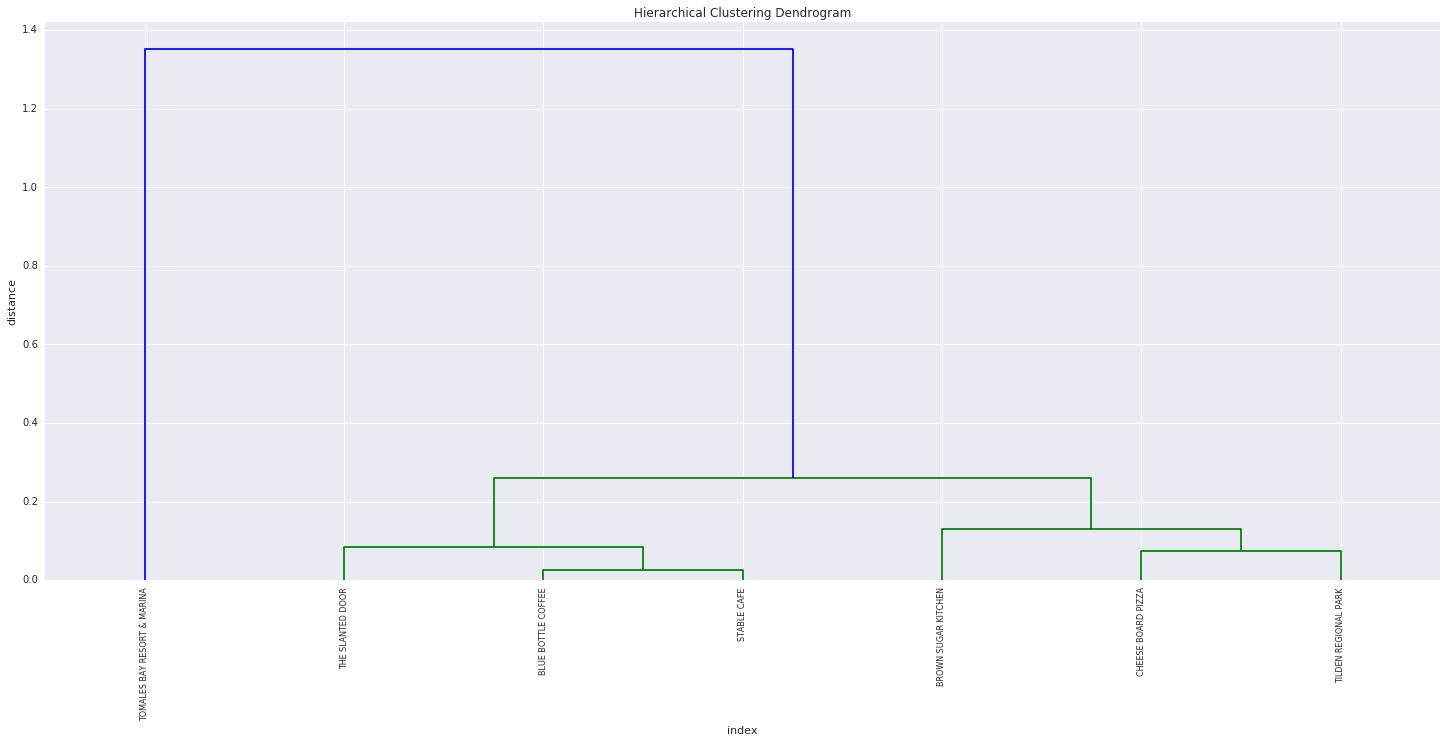

In [55]:

from scipy.cluster.hierarchy import linkage, dendrogram
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(
    linkage(distxy),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,
    labels=data_filtered.name.values,# font size for the x axis labels
)
plt.show()

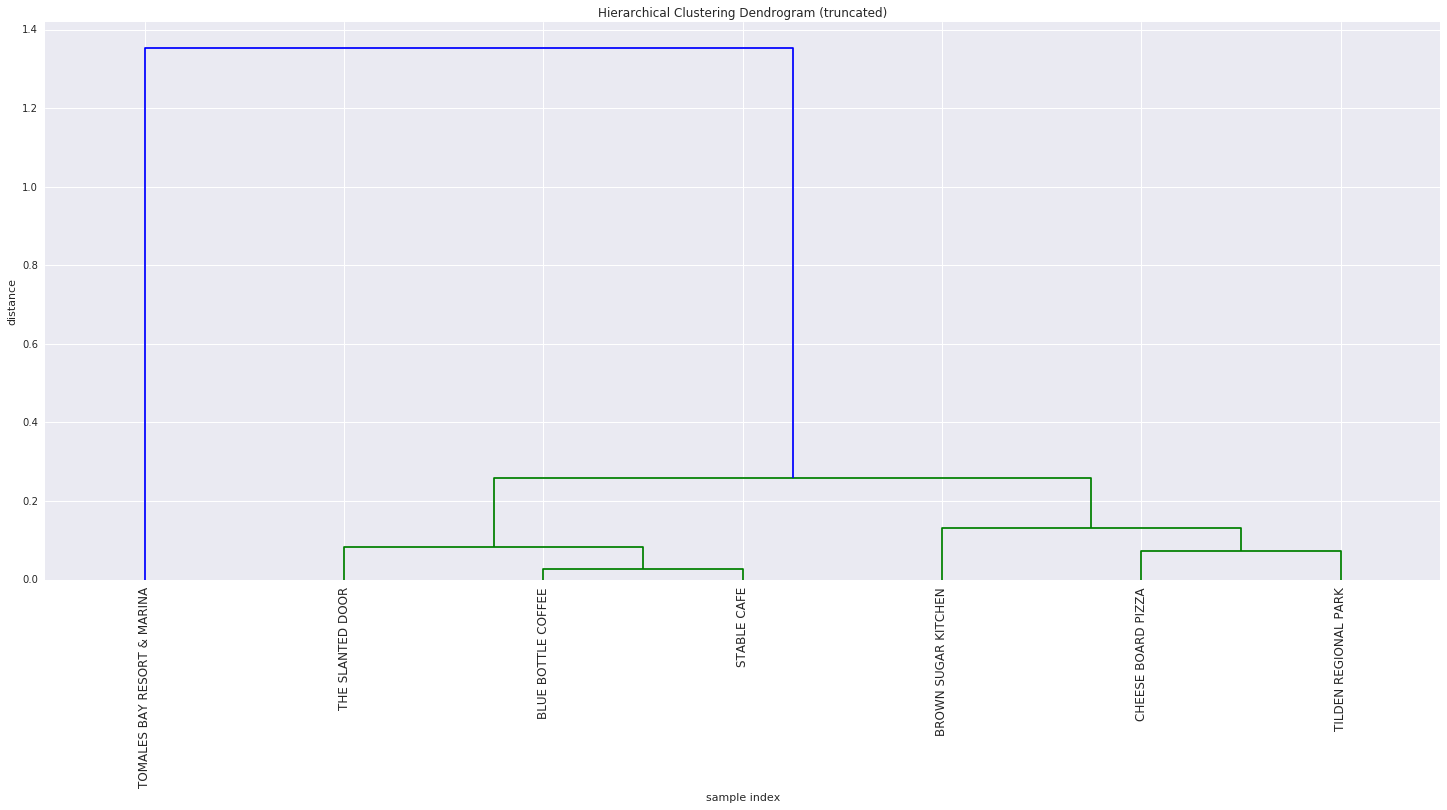

In [56]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(distxy),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    labels=data_filtered.name.values,# font size for the x axis labels
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [57]:
data_filtered

,name,place_id,types,lat,long,places
26,BLUE BOTTLE COFFEE,26,"[cafe, food, store, point_of_interest, establi...",37.776196,-122.423316,BBC
31,BROWN SUGAR KITCHEN,31,"[restaurant, food, point_of_interest, establis...",37.820328,-122.288797,BSK
38,CHEESE BOARD PIZZA,38,"[restaurant, food, point_of_interest, establis...",37.879872,-122.269479,CBP
142,STABLE CAFE,142,"[cafe, meal_takeaway, restaurant, food, store,...",37.763237,-122.415483,SC
156,THE SLANTED DOOR,156,"[bar, restaurant, food, point_of_interest, est...",37.796189,-122.394041,TSD
158,TILDEN REGIONAL PARK,158,"[park, point_of_interest, establishment]",37.892767,-122.242451,TRP
159,TOMALES BAY RESORT & MARINA,159,"[lodging, point_of_interest, establishment]",38.107038,-122.862864,TBRM


In [58]:
data_filtered.to_csv('data/geocode.csv')

In [59]:
from scipy.cluster.hierarchy import fcluster
Z = linkage(distxy)
thing = fcluster(Z, 5, criterion='maxclust')
thing

array([1, 4, 3, 1, 2, 3, 5], dtype=int32)

In [106]:
from scipy.cluster.hierarchy import fcluster
Z = linkage(distxy)
np.unique(thing, return_counts=True)
min_points = 5
k = 1
while True:
    this_thing = fcluster(Z, k + 1, criterion='maxclust')
    thing_counts = np.unique(this_thing, return_counts=True)
    if thing_counts[1][0] < min_points:
        break
    good_thing, good_counts = this_thing, thing_counts
    k += 1
    
print k
print good_thing
print good_counts

2
[1 1 1 1 1 1 2]
(array([1, 2], dtype=int32), array([6, 1]))


In [111]:
from scipy.cluster.hierarchy import fcluster
Z = linkage(distxy)
np.unique(thing, return_counts=True)
min_points = 6
k = 1
while True:
    this_thing = fcluster(Z, k + 1, criterion='maxclust')
    thing_counts = np.unique(this_thing, return_counts=True)
    if thing_counts[1][0] < min_points:
        break
    good_thing, good_counts = this_thing, thing_counts
    k += 1
    
print k
print good_thing
print good_counts

2
[1 1 1 1 1 1 2]
(array([1, 2], dtype=int32), array([6, 1]))


In [61]:
from scipy.cluster.hierarchy import fcluster
Z = linkage(distxy)
thing = fcluster(Z, 3, criterion='maxclust')
thing


#raw input: have 8 places, want to do four of them. 

#check the largest group is the same, return that group
#grab those indices

array([1, 2, 2, 1, 1, 2, 3], dtype=int32)

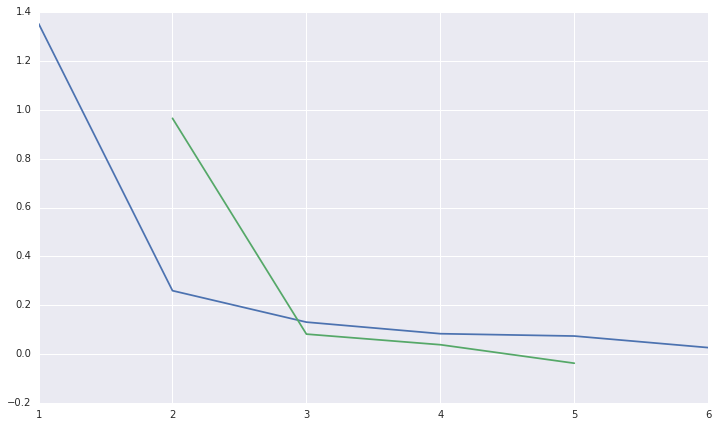

clusters: 2


In [62]:
plt.figure(figsize=(12,7))
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print "clusters:", k

In [63]:
from scipy.cluster.hierarchy import ClusterNode, leaves_list

leaves = leaves_list(Z)
print leaves


[6 4 0 3 1 2 5]


In [64]:
from geopy.geocoders import GoogleV3
from geopy.geocoders import Nominatim
import time

geolocator = GoogleV3()
geolocator2 = Nominatim()



In [65]:
from geopy.distance import vincenty, great_circle
blue_bottle_coffee = (37.776196, -122.423316)
brown_sugar_kitchen = (37.820328, -122.288797)
print(vincenty(blue_bottle_coffee,brown_sugar_kitchen).miles)
print(great_circle(blue_bottle_coffee,brown_sugar_kitchen).miles)


7.96604477866
7.95425139742


In [66]:
from fastcluster import *
data_link = linkage(distxy) 
%timeit data_link = linkage(distxy, method='single', metric='euclidean', preserve_input=True)


10000 loops, best of 3: 30.3 µs per loop


In [67]:
import graphlab as gl
import pandas as pd
import graphlab as gl


In [68]:
data = gl.SFrame.read_csv('points.csv')
data['weight'] = .5
data.show


This non-commercial license of GraphLab Create is assigned to sarubenfeld@gmail.com and will expire on August 27, 2016. For commercial licensing options, visit https://dato.com/buy/.


2016-04-29 10:23:11,484 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: /tmp/graphlab_server_1461950589.log


Finished parsing file /Users/samirubenfeld/Desktop/capstone/points.csv

Parsing completed. Parsed 30 lines in 0.048458 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float,float,str,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/samirubenfeld/Desktop/capstone/points.csv

Parsing completed. Parsed 30 lines in 0.023901 secs.

<bound method SFrame.show of Columns:
	place_A	str
	Lat_A	float
	Lon_A	float
	place_B	str
	Lat_B	float
	Lon_B	float
	weight	float

Rows: 30

Data:
+------------------------+------------+--------------+--------------------------+
|        place_A         |   Lat_A    |    Lon_A     |         place_B          |
+------------------------+------------+--------------+--------------------------+
| 26_BLUE BOTTLE COFFEE  | 37.776196  | -122.423316  |  31_BROWN SUGAR KITCHEN  |
| 26_BLUE BOTTLE COFFEE  | 37.776196  | -122.423316  |  38_CHEESE BOARD PIZZA   |
| 26_BLUE BOTTLE COFFEE  | 37.776196  | -122.423316  |     142_STABLE CAFE      |
| 26_BLUE BOTTLE COFFEE  | 37.776196  | -122.423316  |   156_THE SLANTED DOOR   |
| 26_BLUE BOTTLE COFFEE  | 37.776196  | -122.423316  | 158_TILDEN REGIONAL PARK |
| 31_BROWN SUGAR KITCHEN | 37.8203279 | -122.2887968 |  26_BLUE BOTTLE COFFEE   |
| 31_BROWN SUGAR KITCHEN | 37.8203279 | -122.2887968 |  38_CHEESE BOARD PIZZA   |
| 31_BROWN SUGAR KITCHEN | 37.820

In [69]:
geo_data = gl.SFrame.read_csv('data/geocode.csv')
geo_data['weight'] = .5
geo_data.show

Finished parsing file /Users/samirubenfeld/Desktop/capstone/data/geocode.csv

Parsing completed. Parsed 7 lines in 0.015618 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,list,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/samirubenfeld/Desktop/capstone/data/geocode.csv

Parsing completed. Parsed 7 lines in 0.015292 secs.

<bound method SFrame.show of Columns:
	X1	int
	name	str
	place_id	int
	types	list
	lat	float
	long	float
	places	str
	weight	float

Rows: 7

Data:
+-----+-----------------------------+----------+-------------------------------+
|  X1 |             name            | place_id |             types             |
+-----+-----------------------------+----------+-------------------------------+
|  26 |      BLUE BOTTLE COFFEE     |    26    | [cafe, food, store, point_... |
|  31 |     BROWN SUGAR KITCHEN     |    31    | [restaurant, food, point_o... |
|  38 |      CHEESE BOARD PIZZA     |    38    | [restaurant, food, point_o... |
| 142 |         STABLE CAFE         |   142    | [cafe, meal_takeaway, rest... |
| 156 |       THE SLANTED DOOR      |   156    | [bar, restaurant, food, po... |
| 158 |     TILDEN REGIONAL PARK    |   158    | [park, point_of_interest, ... |
| 159 | TOMALES BAY RESORT & MARINA |   159    | [lodging, point_of_interes... |
+-----+-----------------------------+------

In [70]:
geo_data

X1,name,place_id,types,lat,long,places,weight
26,BLUE BOTTLE COFFEE,26,"[cafe, food, store,point_of_interest, ...",37.776196,-122.423316,BBC,0.5
31,BROWN SUGAR KITCHEN,31,"[restaurant, food,point_of_interest, ...",37.8203279,-122.2887968,BSK,0.5
38,CHEESE BOARD PIZZA,38,"[restaurant, food,point_of_interest, ...",37.8798723,-122.2694794,CBP,0.5
142,STABLE CAFE,142,"[cafe, meal_takeaway,restaurant, food, store, ...",37.7632367,-122.4154832,SC,0.5
156,THE SLANTED DOOR,156,"[bar, restaurant, food,point_of_interest, ...",37.7961888,-122.394041,TSD,0.5
158,TILDEN REGIONAL PARK,158,"[park, point_of_interest,establishment] ...",37.892767,-122.242451,TRP,0.5
159,TOMALES BAY RESORT &MARINA ...,159,"[lodging,point_of_interest, ...",38.1070379,-122.8628638,TBRM,0.5


In [71]:
geo_code_2 = geo_data.select_columns(['name', 'lat', 'long'])


In [72]:
from graphlab import SGraph, Vertex, Edge
g = SGraph()



In [73]:
gl.distances.euclidean([37.776196, -122.423316], [37.8203279,-122.2887968])

0.14157344301192312

In [74]:
gl.distances.euclidean([37.8798723, -122.2694794], [38.1070379, -122.8628638])

0.6353811895128196

In [75]:
df = geo_code_2.select_columns(['lat', 'long'])
df.show



<bound method SFrame.show of Columns:
	lat	float
	long	float

Rows: 7

Data:
+------------+--------------+
|    lat     |     long     |
+------------+--------------+
| 37.776196  | -122.423316  |
| 37.8203279 | -122.2887968 |
| 37.8798723 | -122.2694794 |
| 37.7632367 | -122.4154832 |
| 37.7961888 | -122.394041  |
| 37.892767  | -122.242451  |
| 38.1070379 | -122.8628638 |
+------------+--------------+
[7 rows x 2 columns]
>

In [76]:
gl.distances.euclidean(df[0], df[1])

0.1415734430152351

In [77]:
gl.distances.euclidean(df[0], df[2])

0.18551138692209745

In [78]:
gl.distances.euclidean(df[0], df[3])


0.01514252980844302

In [79]:
gl.distances.euclidean(df[0], df[4])



0.03545049613415984

In [80]:
gl.distances.euclidean(df[0], df[5])


0.21517654674518863

In [81]:
gl.distances.euclidean(df[0], df[6])

0.5501441913509169

In [82]:
# [37.776196, -122.423316]
# [37.8203279, -122.2887968]
# [37.8798723, -122.2694794]
# [37.7632367, -122.4154832]
# [37.7961888, -122.394041]
# [37.892767, -122.242451]
# [38.1070379, -122.8628638]


In [83]:


def girvan_newman_step(G):
    '''
    INPUT: Graph G
    OUTPUT: None

    Run one step of the Girvan-Newman community detection algorithm.
    Afterwards, the graph will have one more connected component.
    '''
    init_ncomp = nx.number_connected_components(G)
    ncomp = init_ncomp
    while ncomp == init_ncomp:
        bw = Counter(nx.edge_betweenness_centrality(G))
        a, b = bw.most_common(1)[0][0]
        G.remove_edge(a, b)
        ncomp = nx.number_connected_components(G)

In [84]:
girvan_newman_step(G_new)

In [85]:
def find_communities_n(G, n):
    '''
    INPUT: Graph G, int n
    OUTPUT: list of lists

    Run the Girvan-Newman algorithm on G for n steps. Return the resulting
    communities.
    '''
    G1 = G.copy()
    for i in xrange(n):
        girvan_newman_step(G1)
    return list(nx.connected_components(G1))

In [86]:
find_communities_n(G_new, 1)


[{'156_THE SLANTED DOOR',
  '158_TILDEN REGIONAL PARK',
  '26_BLUE BOTTLE COFFEE',
  '38_CHEESE BOARD PIZZA'},
 {'31_BROWN SUGAR KITCHEN'},
 {'142_STABLE CAFE'}]

In [87]:
find_communities_n(G, 2)

[{'156_THE SLANTED DOOR',
  '158_TILDEN REGIONAL PARK',
  '26_BLUE BOTTLE COFFEE',
  '38_CHEESE BOARD PIZZA'},
 {'31_BROWN SUGAR KITCHEN'},
 {'142_STABLE CAFE'}]

In [88]:
find_communities_n(G, 5)

[{'26_BLUE BOTTLE COFFEE'},
 {'31_BROWN SUGAR KITCHEN'},
 {'142_STABLE CAFE'},
 {'38_CHEESE BOARD PIZZA'},
 {'156_THE SLANTED DOOR'},
 {'158_TILDEN REGIONAL PARK'}]

In [89]:
def get_modularity(subgraphs, degrees, num_edges):
    '''
    INPUT:
        subgraphs: graph broken in subgraphs
        degrees: dictionary of degree values of original graph
        num_edges: float, number of edges in original graph
    OUTPUT: Float (modularity value, between -0.5 and 1)

    Return the value of the modularity for the graph G.
    '''
    mod = 0
    for g in subgraphs:
        for node1 in g:
            for node2 in g:
                mod += int(g.has_edge(node1, node2))
                mod -= degrees[node1] * degrees[node2] / (2. * num_edges)
    return mod / (2. * num_edges)


In [90]:
def find_communities_modularity(G, max_iter=None):
    '''
    INPUT:
        G: networkx Graph
        max_iter: (optional) if given, maximum number of iterations
    OUTPUT: list of lists of strings (node names)

    Run the Girvan-Newman algorithm on G and find the communities with the
    maximum modularity.
    '''
    degrees = G.degree()
    num_edges = G.number_of_edges()
    G1 = G.copy()
    best_modularity = -1.0
    best_comps = nx.connected_components(G1)
    i = 0
    while G1.number_of_edges() > 0:
        subgraphs = nx.connected_component_subgraphs(G1)
        modularity = get_modularity(subgraphs, degrees, num_edges)
        if modularity > best_modularity:
            best_modularity = modularity
            best_comps = list(nx.connected_components(G1))
        girvan_newman_step(G1)
        i += 1
        if max_iter and i >= max_iter:
            break
    return best_comps


In [91]:
find_communities_modularity(G_new, max_iter=None)

[{'156_THE SLANTED DOOR',
  '158_TILDEN REGIONAL PARK',
  '26_BLUE BOTTLE COFFEE',
  '31_BROWN SUGAR KITCHEN',
  '38_CHEESE BOARD PIZZA'},
 {'142_STABLE CAFE'}]

In [92]:
find_communities_modularity(G, max_iter=None)

[{'142_STABLE CAFE',
  '156_THE SLANTED DOOR',
  '158_TILDEN REGIONAL PARK',
  '26_BLUE BOTTLE COFFEE',
  '31_BROWN SUGAR KITCHEN',
  '38_CHEESE BOARD PIZZA'}]

In [93]:
c = find_communities_modularity(G)
print c
print "Optimal number of communities: %d" % len(c)

[set(['26_BLUE BOTTLE COFFEE', '31_BROWN SUGAR KITCHEN', '142_STABLE CAFE', '38_CHEESE BOARD PIZZA', '156_THE SLANTED DOOR', '158_TILDEN REGIONAL PARK'])]
Optimal number of communities: 1


In [94]:
c = find_communities_modularity(G_new)
print c
print "Optimal number of communities: %d" % len(c)

[set(['38_CHEESE BOARD PIZZA', '158_TILDEN REGIONAL PARK', '26_BLUE BOTTLE COFFEE', '156_THE SLANTED DOOR', '31_BROWN SUGAR KITCHEN']), set(['142_STABLE CAFE'])]
Optimal number of communities: 2
